In [1]:
import sys
sys.path.append('..')
import torch
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
from src.training import train_model, eval_func
from src.models import Resnet18_FC_Changed
import os
from torchvision import datasets, models, transforms
from src.data_loader import imshow, GetDataLoaders
from src.modelvis import visualize_models
from torch.optim.lr_scheduler import StepLR

plt.ion()

Device: cpu


ModuleNotFoundError: No module named 'timm'

# Hyperparameters

In [2]:
T_0 = 1000 # Number of iterations for the first restart.
LEARNING_RATE=1e-4 # 0.0001
WEIGHT_DECAY=1e-8 # 0.000001
NUM_EPOCHS=3
BATCH_SIZE=32
MOMENTUM=0.09
num_of_classes = 64

In [3]:
from src.data_loader import GetDataLoaders, GetDataLoadersLimited

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_dir = '..\\data\\miniImageNet'
dataloaders, class_names, dataset_sizes  = GetDataLoaders(data_dir, BATCH_SIZE, 600)

train_loader = dataloaders['train']
validation_loader = dataloaders['val']
test_loader = dataloaders['test']

In [4]:
print(" -- Training Set -- ")
print(len(train_loader.dataset.imgs))
print(len(train_loader.dataset.classes))
print(len(train_loader.dataset.imgs)/len(train_loader.dataset.classes))


print(" -- Validation Set -- ")
print(len(validation_loader.dataset.imgs))
print(len(validation_loader.dataset.classes))
print(len(validation_loader.dataset.imgs)/len(validation_loader.dataset.classes))

print(" -- Test Set -- ")
print(len(test_loader.dataset.imgs))
print(len(test_loader.dataset.classes))
print(len(test_loader.dataset.imgs)/len(test_loader.dataset.classes))

 -- Training Set -- 
38400
64
600.0
 -- Validation Set -- 
9600
16
600.0
 -- Test Set -- 
12000
20
600.0


In [5]:
net = Shufflenet_v2_x0_5(num_of_classes).to(device)

for p in net.parameters():
    p.requires_grad = True
net.train()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = StepLR(optimizer, step_size=7, gamma=0.01)

print('Please wait patiently, it may take some seconds...')
best_model = train_model(net, dataloaders, criterion, optimizer, scheduler, NUM_EPOCHS, dataset_sizes)
save_path = '..\\data\\models\\best_model_Shufflenet_v2_x0_5.pth'
torch.save(best_model.state_dict(), save_path)

Please wait patiently, it may take some seconds...
Epoch 0/2
----------


In [ ]:
best_model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

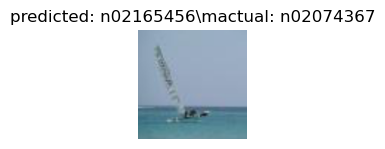

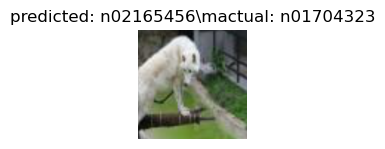

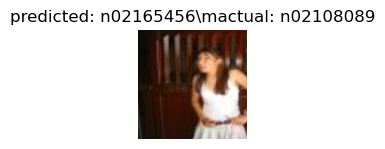

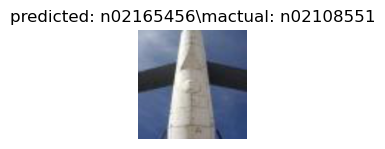

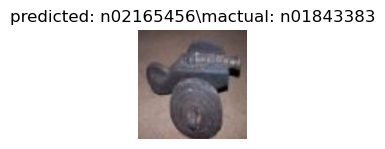

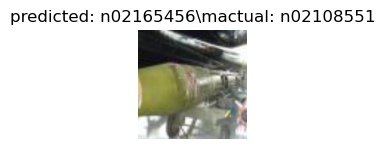

In [ ]:
# from src.modelvis import visualize_models
import numpy as np
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_models(model, dataloaders, num_images, class_names):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}\nactual: {class_names[labels[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

num_images=6
visualize_models(best_model, dataloaders, num_images, class_names)

In [ ]:
from src.models import Resnet18_FC_Changed, EfficientNetB0_FC_Changed
net = Resnet18_FC_Changed(num_of_classes).to(device)
for p in net.parameters():
    p.requires_grad = True
net.train()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = StepLR(optimizer, step_size=7, gamma=0.01)

print('Please wait patiently, it may take some seconds...')
best_model = train_model(net, dataloaders, criterion, optimizer, scheduler, NUM_EPOCHS)
save_path = '..\\data\\models\\best_model_Resnet18.pth'
torch.save(best_model.state_dict(), save_path)

Please wait patiently, it may take some seconds...


TypeError: train_model() missing 1 required positional argument: 'dataset_sizes'

In [ ]:
best_model.load_state_dict(torch.load(save_path))
visualize_model(best_model, dataloaders, num_images, class_names)

In [ ]:
net = EfficientNetB0_FC_Changed(num_of_classes).to(device)
for p in net.parameters():
    p.requires_grad = True
net.train()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = StepLR(optimizer, step_size=7, gamma=0.01)

print('Please wait patiently, it may take some seconds...')
best_model = train_model(net, dataloaders, criterion, optimizer, scheduler, NUM_EPOCHS)
save_path = '..\\data\\models\\best_model_EfficientNetB0_FC_Changed.pth'
torch.save(best_model.state_dict(), save_path)

In [ ]:
best_model.load_state_dict(torch.load(save_path))
visualize_model(best_model, dataloaders, num_images, class_names)